<a href="https://colab.research.google.com/github/jofmorenore/TimeSeries/blob/master/proyecto/Parcial1_ST_practico_20221.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython

Considere la serie de tiempo que le correspondió del archivo Retail.xlsx.
Asuma que el el año 2018 es el año de validación y el año 2019 es el año de
prueba.

In [ ]:
%%R
install.packages("fpp3")
library(fpp3)
library(dplyr)

In [16]:
%%R
data(aus_retail)
str(aus_retail)

tbl_ts [64,532 × 5] (S3: tbl_ts/tbl_df/tbl/data.frame)
 $ State    : chr [1:64532] "Australian Capital Territory" "Australian Capital Territory" "Australian Capital Territory" "Australian Capital Territory" ...
 $ Industry : chr [1:64532] "Cafes, restaurants and catering services" "Cafes, restaurants and catering services" "Cafes, restaurants and catering services" "Cafes, restaurants and catering services" ...
 $ Series ID: chr [1:64532] "A3349849A" "A3349849A" "A3349849A" "A3349849A" ...
 $ Month    : mth [1:64532] 1982 Apr, 1982 May, 1982 Jun, 1982 Jul, 1982 Aug, 1982 S...
 $ Turnover : num [1:64532] 4.4 3.4 3.6 4 3.6 4.2 4.8 5.4 6.9 3.8 ...
 - attr(*, "key")= tibble [152 × 3] (S3: tbl_df/tbl/data.frame)
  ..$ State   : chr [1:152] "Australian Capital Territory" "Australian Capital Territory" "Australian Capital Territory" "Australian Capital Territory" ...
  ..$ Industry: chr [1:152] "Cafes, restaurants and catering services" "Cafes, restaurants and takeaway food services" "Clothin

In [8]:
%%R
count(aus_retail, Industry, max(Month))

# A tibble: 20 × 3
   Industry                                                       max(Mo…¹     n
   <chr>                                                             <mth> <int>
 1 Cafes, restaurants and catering services                       2018 Dec  3456
 2 Cafes, restaurants and takeaway food services                  2018 Dec  3456
 3 Clothing retailing                                             2018 Dec  3456
 4 Clothing, footwear and personal accessory retailing            2018 Dec  3456
 5 Department stores                                              2018 Dec  2646
 6 Electrical and electronic goods retailing                      2018 Dec  3456
 7 Food retailing                                                 2018 Dec  3456
 8 Footwear and other personal accessory retailing                2018 Dec  3456
 9 Furniture, floor coverings, houseware and textile goods retai… 2018 Dec  3456
10 Hardware, building and garden supplies retailing               2018 Dec  3456
11 Househ

In [10]:
%%R
aus_cafe <- aus_retail %>%
  filter(
    Industry == "Cafes, restaurants and takeaway food services",
    year(Month) %in% 2017:2018
  )%>%
  summarise(Turnover = sum(Turnover))
str(aus_cafe)

tbl_ts [24 × 2] (S3: tbl_ts/tbl_df/tbl/data.frame)
 $ Month   : mth [1:24] 2017 Jan, 2017 Feb, 2017 Mar, 2017 Apr, 2017 May, 2017 Jun,...
 $ Turnover: num [1:24] 3621 3261 3619 3567 3598 ...
 - attr(*, "key")= tibble [1 × 1] (S3: tbl_df/tbl/data.frame)
  ..$ .rows: list<int> [1:1] 
  .. ..$ : int [1:24] 1 2 3 4 5 6 7 8 9 10 ...
  .. ..@ ptype: int(0) 
 - attr(*, "index")= chr "Month"
  ..- attr(*, "ordered")= logi TRUE
 - attr(*, "index2")= chr "Month"
 - attr(*, "interval")= interval [1:1] 1M
  ..@ .regular: logi TRUE


# Punto 1
Haga una análisis descriptivo de la serie de tiempo, es decir, realice todos los análisis necesarios para detectar las posibles caracterı́sticas que tiene presente la serie. Qué puede usted observar al respecto? (5 puntos)

Plot variable not specified, automatically selected `.vars = Turnover`


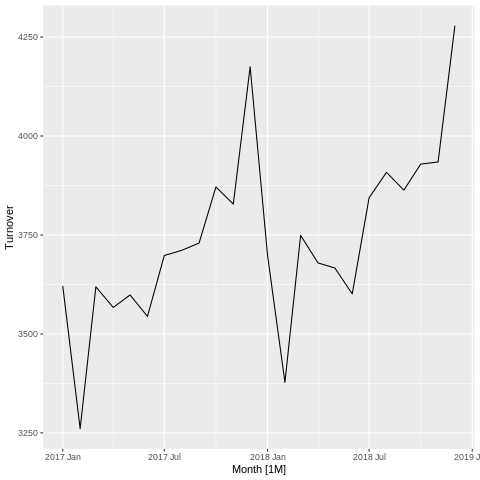

In [11]:
%%R
aus_cafe%>%autoplot()

La serie de `Retail` muestra una tendencia que parece ser determinística, la cual en general es creciente aunque no monotonamente, también muestra un ciclo estacional al inicio y al final de cada período anual, es decir el valor de la serie en el mes inicial de cada año decrece hasta llegar a su valor µinimo en el año, mientras que el valor de la serie en el mes final de cada año se incrementa hasta llegar a su valor máximo en el año, finalmente la serie muestra heterocedasticidad marginal.

# Punto 2
Ajuste 3 modelos para la serie de tiempo indicada